In [1]:
%reload_ext autoreload

%autoreload 2

from model import *
import functools as ft
import matplotlib.pyplot as plt
from skimage.io import imsave

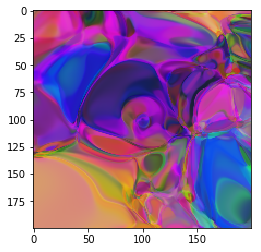

In [12]:
latent_dim = 8 # Was: 9
TAXICAB    = ft.partial(np.linalg.norm, axis=0, ord=1)
EUCLIDEAN  = ft.partial(np.linalg.norm, axis=0, ord=2)
norm       = ft.partial(np.linalg.norm, axis=0, ord=-2)
norm       = EUCLIDEAN


c = Config( net_size = 30 # Was: 50
          , num_dense = 9
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = []
          )

size   = 200
width  = size
height = size

m = build_model(c, width, height)

sess = tf.InteractiveSession()

z = np.random.normal(0, 1, size=c.latent_dim)

sess.run(tf.global_variables_initializer())
yys = forward(sess, c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))

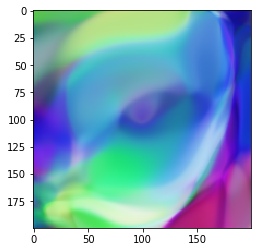

In [3]:
z = np.random.normal(0, 1, size=c.latent_dim)

yys = forward(sess, c, m, z, width, height)

ys1 = stitch_together(yys)
plt.imshow(ys1)

In [4]:
c = Config( net_size = 30 # Was: 50
          , num_dense = 5
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = ["left", "right"]
          )

m = build_model(c, width, height)

0: loss: 11.92920970916748
500: loss: 6.856745719909668
1000: loss: 6.85178279876709
1500: loss: 6.850807189941406
2000: loss: 6.8497538566589355
2500: loss: 6.849318027496338
3000: loss: 6.84895133972168
3500: loss: 6.848768711090088
4000: loss: 6.849681377410889
4500: loss: 6.8496294021606445


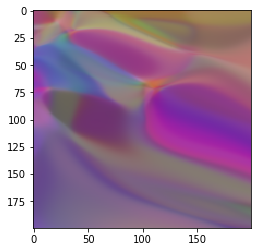

In [5]:
steps = 5000

optim      = tf.train.AdamOptimizer(learning_rate=0.01)
train_step = optim.minimize( m.matching_loss )


matching_pixels_1 = np.transpose( ys[:, width - 1: width, :], [1, 0, 2])
matching_pixels_2 = np.transpose(ys1[:,         0:     1, :], [1, 0, 2])
matching_pixels   = np.concatenate( [matching_pixels_1, matching_pixels_2 ], axis = 0 )


xs = get_input_data(c, width, height )


sess.run(tf.global_variables_initializer())

for k in range(steps):
    data = { m.matching_pixels: matching_pixels
           , m.xs: xs }
    _, loss = sess.run( [train_step, m.matching_loss], feed_dict=data )

    if loss < 0.1:
        break

    if k % 500 == 0:
        print(f"{k}: loss: {loss}")

new_ys = sess.run( m.ys, feed_dict={ m.xs: xs } )

plt.imshow(new_ys)

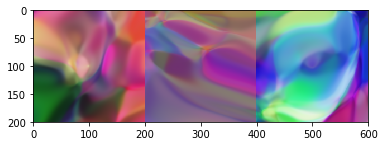

In [6]:
mm = np.concatenate( [ys, new_ys, ys1], axis = 1 )
plt.imshow(mm)